In [469]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import statistics

In [473]:
xls_file = pd.ExcelFile("PSD_1micron_mar22.xlsx") #just load the excel file containing PSD data

In [474]:
#reading each sheet into a data frame
df_150mA = pd.read_excel(xls_file, '150mA')
df_200mA = pd.read_excel(xls_file, '200mA')
df_250mA = pd.read_excel(xls_file, '250mA')
df_300mA = pd.read_excel(xls_file, '300mA')
df_350mA = pd.read_excel(xls_file, '350mA')
df_400mA = pd.read_excel(xls_file, '400mA')

In [475]:
frequency = 20 #Hz, frequency of oscillation we are forcing (triangular voltage input)
meas_len = 5 #5 seconds of measurement
time_display_start = 0 #x-axis start of all plots
time_display_stop = 1 #x-axis limit for all plots
workbook_name = "tweezers_data.xlsx"
temperature = 294 #Kelvin

sheet_name = '1micron'
picked_power = 150 #mA

In [476]:
tweezers_data_file = pd.ExcelFile(workbook_name)
df_tweezers = pd.read_excel(tweezers_data_file, sheet_name)
arr_tweezers = df_tweezers.to_numpy()
qpd_laser_powers = arr_tweezers[:,0]
qpd_sens = arr_tweezers[:,1]
stiffness_arr = arr_tweezers[:, 2]

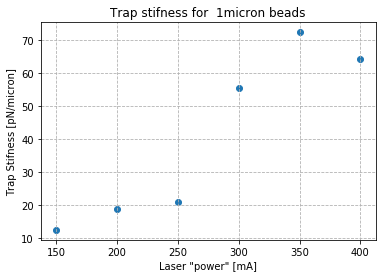

In [477]:
#Plot avg. QPD sensitivity as a function of laser power
plt.scatter(qpd_laser_powers, stiffness_arr)
plt.xlabel('Laser "power" [mA]')
plt.ylabel('Trap Stifness [pN/micron]')
plt.title("Trap stifness for  " + sheet_name + " beads")
plt.grid(linestyle='--')

In [478]:
n_of_datapoints = len(df_150mA.index) #how many time values are taken?
time = np.arange(0,meas_len,meas_len/n_of_datapoints) #create a new array with time series

In [479]:
#convert PSD measurement dataframe to numpy arrays (I lowkey hate to work with this dataframe format)
arr_150mA = df_150mA.to_numpy()
arr_200mA = df_200mA.to_numpy()
arr_250mA = df_250mA.to_numpy()
arr_300mA = df_300mA.to_numpy()
arr_350mA = df_350mA.to_numpy()
arr_400mA = df_400mA.to_numpy()

In [480]:
stokes_laser_powers = np.array([150, 200, 250, 300, 350, 400])

laser_power_index = int(np.where(stokes_laser_powers == picked_power)[0])
laser_power_arrays = [arr_150mA, arr_200mA, arr_250mA, arr_300mA, arr_350mA, arr_400mA]
picked_dev = laser_power_arrays[laser_power_index]

In [481]:
#load each column into an np array:
qpd_x = picked_dev[:,0]
qpd_y = picked_dev[:,1]
qpd_z = picked_dev[:,2]

Text(0, 0.5, 'QPD voltage (V)')

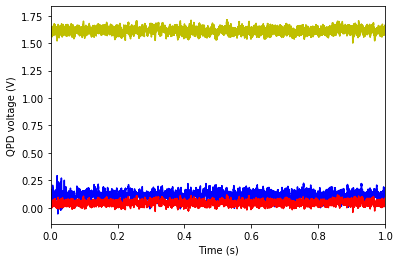

In [482]:
#just plotting qpd voltage data versus time here
plt.plot(time, qpd_x, 'b')
plt.plot(time, qpd_y, 'r')
plt.plot(time, qpd_z, 'y')
plt.xlim(time_display_start, time_display_stop)
plt.xlabel('Time (s)')
plt.ylabel('QPD voltage (V)')

In [483]:
power_index = int(np.where(qpd_laser_powers == picked_power)[0])
sensitivity = qpd_sens[power_index] #microns/volt
stiffness = stiffness_arr[power_index] *1E-6 #stifness in N/m
print(sensitivity, " microns/volt qpd sensitivity at ", picked_power, " mA laser power (" + str(stiffness) + " pN/micron stiffness)")

0.06142643136963548  microns/volt qpd sensitivity at  150  mA laser power (1.240594071722001e-05 pN/micron stiffness)


In [484]:
variance = statistics.variance(qpd_x)# variance of qpd voltage
pos_variance = variance * sensitivity * 1E-12 #converted into meters^2

In [485]:
def find_kb(pos_variance, stiffness, temp):
    kb = stiffness * pos_variance / temp
    return(kb)

In [486]:
kb = find_kb(pos_variance, stiffness, temperature)
print(kb)

3.2541340349432214e-24


In [487]:
import openpyxl

# python sucks and I can't write into an existing file that easily so I need to do the following:
write_file = openpyxl.load_workbook(workbook_name) #handler for writing into an existing excel file
sheet = write_file.get_sheet_by_name(sheet_name) #get the name of the existing sheet

power_index = np.where(qpd_laser_powers == picked_power)[0][0] #find the index of the laser power used
sheet.cell(row=power_index+2, column=4).value = kb #write the average qpd sensitivity value next to the relevant laser power

write_file.save(workbook_name) #save the excel file

ipykernel_launcher:5: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
